In [1]:
# NO CODE

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from scipy import stats

In [2]:
# NO CODE

def dist_sum(n, probs_0_through_N):
    """Return the distribution of S_n,
    the sum of n i.i.d. copies
    of a random variable with distribution probs_0_through_N
    on the integers 0, 1, 2, ..., N"""
    
    # Find the possible values of S_n
    N = len(probs_0_through_N) - 1   
    values_Sn = np.arange(n*N + 1)
    
    # Find the probailities of those values
    coeffs_X1 = np.flipud(probs_0_through_N)
    pgf_X1 = np.poly1d(coeffs_X1)
    pgf_Sn = pgf_X1 ** n
    coeffs_Sn = pgf_Sn.c
    probs_Sn = np.flipud(coeffs_Sn)
    
    t = Table().values(values_Sn).probabilities(probs_Sn)
    
    Plot(t)

## The Distribution of a Sample Sum ##

Let $X_1, X_2, \ldots, X_n$ be i.i.d. with mean $\mu$ and SD $\sigma$, and let $S_n = X_1 + X_2 + \cdots + X_n$ be the sample sum. We know that

$$
E(S_n) ~ = ~ n\mu ~~~~~~~~~~~~~~ SD(S_n) ~ = ~ \sqrt{n}\sigma
$$

This section is about the shape of the distribution of $S_n$.

In principle, we know how to find the distribution of $S_n$ by using the common distribution of the $X_i$s. For example, if $n = 2$,

$$
\begin{align*}
P(S_2 = s) ~ &= ~ \sum_k P(X_1 = k, X_2 = s-k) \\
&= ~ \sum_k P(X_1 = k)P(X_2 = s-k) ~~~~ \text{by independence}
\end{align*}
$$

This can be cumbersome to simplify analytically but it can be used to find numerical answers by computation. There are also other more advanced methods for finding distributions of sums. In this section we will simply look at some numerical results and see if a pattern emerges.

### Sum of IID Indicators ###
If $X_1, X_2, \ldots, X_n$ are i.i.d. Bernoulli $(p)$ random variables then $S_n$ has the binomial $(n, p)$ distribution.

Here are the distributions of $S_1$ (the same as $X_1$), $S_{12}$, and $S_{60}$ in the case $p = 1/6$. As the sample size increases, the distribution of the sample sum becomes gradually more symmetric and bell shaped.

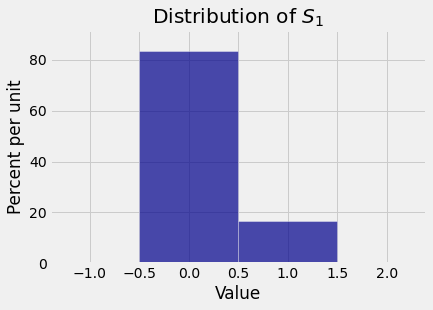

In [3]:
# NO CODE
ind_six = np.array([5/6, 1/6])
dist_sum(1, ind_six)
plt.title('Distribution of $S_1$');

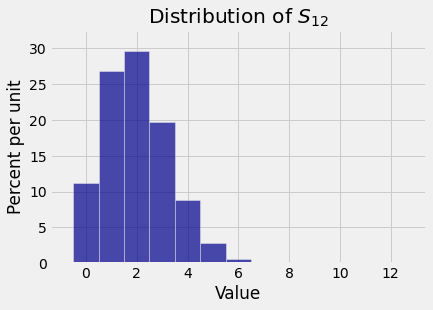

In [4]:
# NO CODE

dist_sum(12, ind_six)
plt.title('Distribution of $S_{12}$');

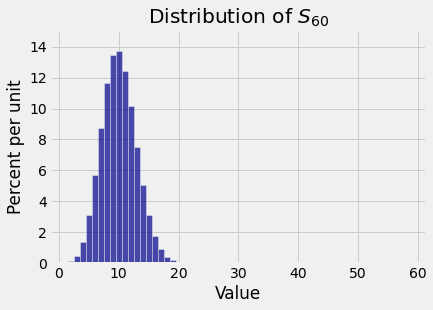

In [5]:
# NO CODE

dist_sum(60, ind_six)
plt.title('Distribution of $S_{60}$');

### Sum of IID Uniform Random Variables ###

Now let $X_1, X_2, \ldots, X_n$ be the numbers of spots that appear in $n$ rolls of a die. Then $S_n$ is the total number of spots in the $n$ rolls.

Here are the distributions of $S_1$, $S_2$, and $S_{10}$. Again you see that as the sample size increases the distribution of the sample sum starts to look bell shaped.

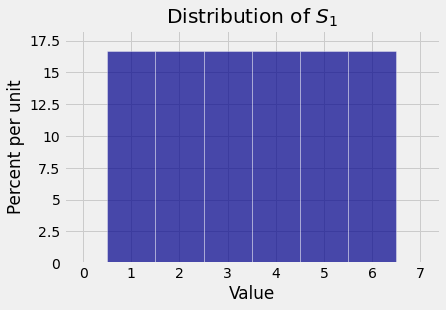

In [6]:
# NO CODE

die = np.append(0, (1/6)*np.ones(6))
dist_sum(1, die)
plt.title('Distribution of $S_1$');

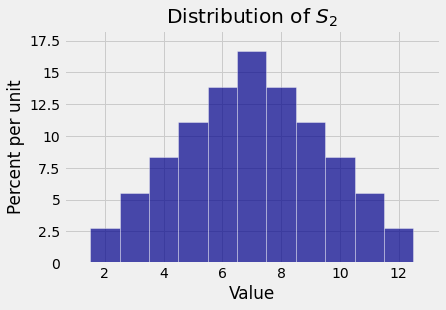

In [7]:
# NO CODE

dist_sum(2, die)
plt.title('Distribution of $S_2$');

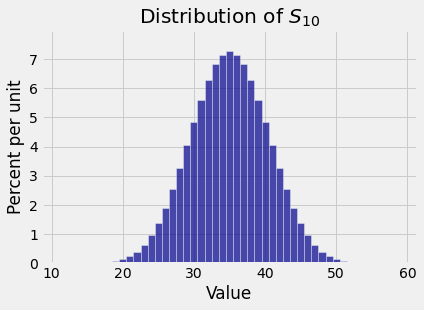

In [8]:
# NO CODE

dist_sum(10, die)
plt.title('Distribution of $S_{10}$');

### A Wild One ###
Distributions of sums can look quite strange, but not when the sample size is large. For example, let $X_1, X_2, \ldots, X_n$ be i.i.d. uniform on the three values $0$, $1$, and $8$. 

Each $X_i$ has expectation 3, and the possible values have a large gap. Here are the distributions of $S_1$, $S_{10}$, $S_{30}$, and $S_{100}$. Keep in mind that these are exact distributions, not empirical approximations.

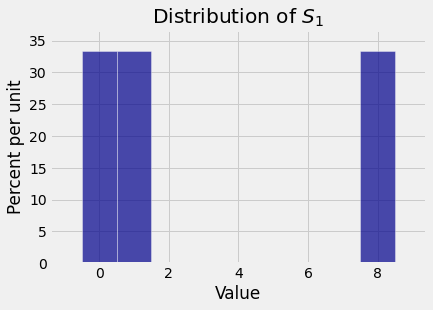

In [9]:
# NO CODE

x1 = (1/3)*make_array(1, 1, 0, 0, 0, 0, 0, 0, 1)
dist_sum(1, x1)
plt.title('Distribution of $S_{1}$');

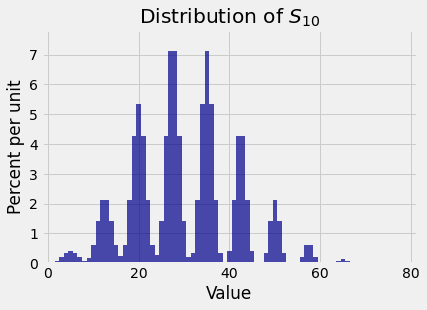

In [10]:
# NO CODE

dist_sum(10, x1)
plt.title('Distribution of $S_{10}$');

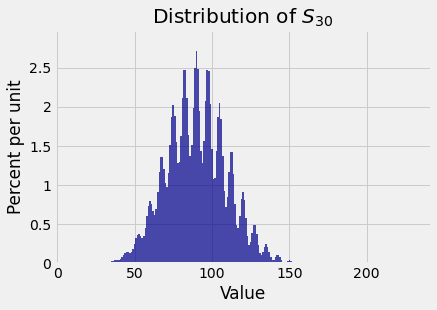

In [11]:
# NO CODE

dist_sum(30, x1)
plt.title('Distribution of $S_{30}$');

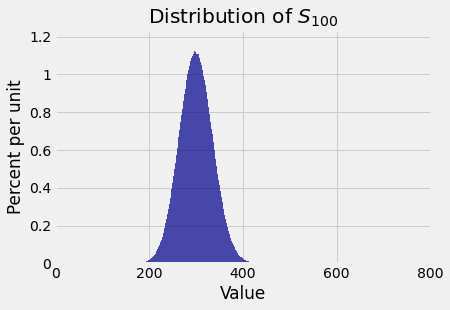

In [12]:
# NO CODE

dist_sum(100, x1)
plt.title('Distribution of $S_{100}$');

Though the distributions of $S_{10}$ and $S_{30}$ are rather spiky, the distribution of $S_{100}$ is beautifully bell shaped. The center of the bell is at $E(S_{100}) = 100 \times 3 = 300$.

These examples are demonstrations of the most important theorem of probability theory.

### Central Limit Theorem ###

The bell-shaped curve that arises as the distribution of a large random sample sum is called a *normal* curve. We will study it in detail in the next section. Here we will just state the general result that has been demonstrated by examples above.

Let $X_1, X_2, \ldots, X_n$ be i.i.d. with $E(X_1) = \mu$ and $SD(X_1) = \sigma$. Let $S_n = X_1 + X_2 + \cdots + X_n$ be the sample sum. If $n$ is large, the distribution of $S_n$ is approximately normal, **regardless of the common distribution of the $X_i$s.**

The center of the bell has to be $E(S_n) = n\mu$.

Not surprisingly, $SD(S_n) = \sqrt{n}\sigma$ tells us how wide the bell must be. 

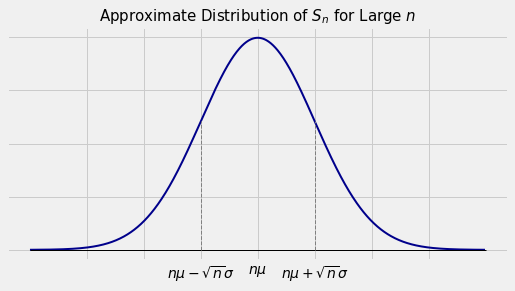

In [13]:
# NO CODE

plt.figure(figsize=(8,4))
z = np.arange(-4, 4, 0.01)
phi = stats.norm.pdf(z)
plt.plot(z, phi, lw=2, color='darkblue')
plt.plot([-4, 4], [0, 0], color='k', lw=1)
phi1 = stats.norm.pdf(1)
plt.plot([1, 1], [0, phi1], color='grey', lw=1, linestyle='--')
plt.plot([-1, -1], [0, phi1], color='grey', lw=1, linestyle='--')
labels = ['','','$n\mu - \sqrt{n}\sigma$', '$n\mu$', '$n\mu + \sqrt{n}\sigma$', '', '']
plt.xticks(np.arange(-3, 3.1), labels)
plt.yticks(np.arange(0, .41, .1), 5*[])
plt.title('Approximate Distribution of $S_n$ for Large $n$', size=15);

In later sections we will see that the points $E(S_n) \pm SD(S_n)$ are the *points of inflection* of the curve. That is, they are the points where the curve goes from being an "upside down cup" to being "right away up."

For example, suppose a university has tens of thousands of undergraduates, and suppose that the average number of textbooks bought by the undergraduates this semester is 3 with an SD of 2. If you draw a simple random sample of 400 undergraduates, you might as well be drawing with replacement, so the draws are essentially iid. Because the sample size is large, the Central Limit Theorem says that the distribution of the total number of textbooks bought this semester by the sampled students looks roughly like this:

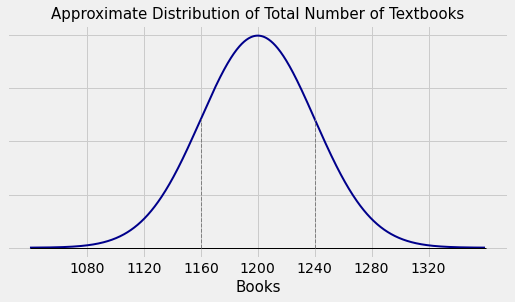

In [14]:
# NO CODE

plt.figure(figsize=(8,4))
z = np.arange(-4, 4, 0.01)
phi = stats.norm.pdf(z)
plt.plot(z, phi, lw=2, color='darkblue')
plt.plot([-4, 4], [0, 0], color='k', lw=1)
phi1 = stats.norm.pdf(1)
plt.plot([1, 1], [0, phi1], color='grey', lw=1, linestyle='--')
plt.plot([-1, -1], [0, phi1], color='grey', lw=1, linestyle='--')
labels = ['1080','1120','$1160$', '$1200$', '$1240$', '1280', '1320']
plt.xticks(np.arange(-3, 3.1), labels)
plt.yticks(np.arange(0, .41, .1), 5*[])
plt.xlabel('Books', size=15)
plt.title('Approximate Distribution of Total Number of Textbooks', size=15);

The numbers on the horizontal axis are computed as follows:

- The center is $E(S_{400}) = 400 \times 3 = 1200$.
- $SD(S_{400}) = \sqrt{400} \times 2 = 40$, so the points of inflection of the curve are at $1200 \pm 40$.
- The other points are labeled accordingly.

The most important point to keep in mind is that the Central Limit Theorem allows us to draw this picture even though we don't know the distribution of the number of textbooks owned by the undergraduates at the school.

The curve is an approximation to a histogram. To find the chance that the total number of books is in some range, we need the area of the histogram over the range. We can approximate that area by the corresponding area under the curve. The total area under the curve corresponds to 100%, and all other areas are calculated relative to that. That is why the vertical scale is not needed.

In the rest of the chapter we will see how to find numerical approximations to chances using normal curves.